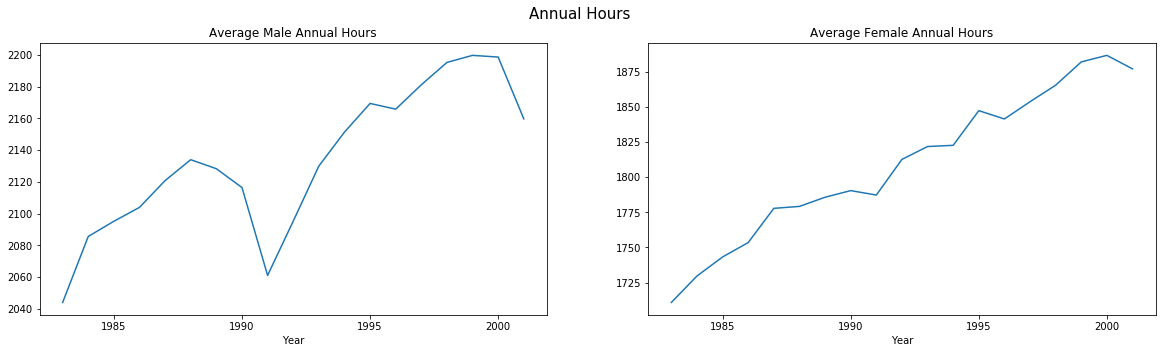

Because women have consistently increased their annual hours whereas men have stayed stagnent at around 2100 hours,
women have been able to increase their average wage more than men. This is because with longer hours, females started 
to get into higher paying jobs, and with same average hours, men were not increasing their population in highly 
expertised field. However, the female average wage did not surpass male average wage because men continued to have 
longer annual hours, and therefore a greater amount of people in advanced careers. These charts clearly demonstrate 
how longer annual hours are correlated with higher wages and more advanced careers.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("../../output/Codes/1digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Annual hours"]].to_numpy())
plt.figure(figsize=[20,5])
years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    if female != digit:
        plt.subplot(1,2,1)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years), 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Annual Hours")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)

plt.subplot(1,2,2)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
string = "Annual Hours"
plt.suptitle(string,fontsize=15)
plt.title("Average Female Annual Hours")
plt.show()

print("""Because women have consistently increased their annual hours whereas men have stayed stagnent at around 2100 hours,
women have been able to increase their average wage more than men. This is because with longer hours, females started 
to get into higher paying jobs, and with same average hours, men were not increasing their population in highly 
expertised field. However, the female average wage did not surpass male average wage because men continued to have 
longer annual hours, and therefore a greater amount of people in advanced careers. These charts clearly demonstrate 
how longer annual hours are correlated with higher wages and more advanced careers.
""")